In [3]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sympy import symbols, exp, diff, evalf

In [4]:
x = symbols('x')
f = exp(-x**2)/(1e-6 + x**2)
df2_max = float(diff(diff(f)).evalf(subs={x:0}))

In [5]:
k = 1e-6
def f(x):
    return np.exp(-x**2)/(k + x**2)

In [6]:
def dfdx(x):
    return -2*x*np.exp(-x**2)*((1+k+x**2)/((k+x**2)**2))

In [7]:
xn = np.linspace(0.1, 9.9, 500)

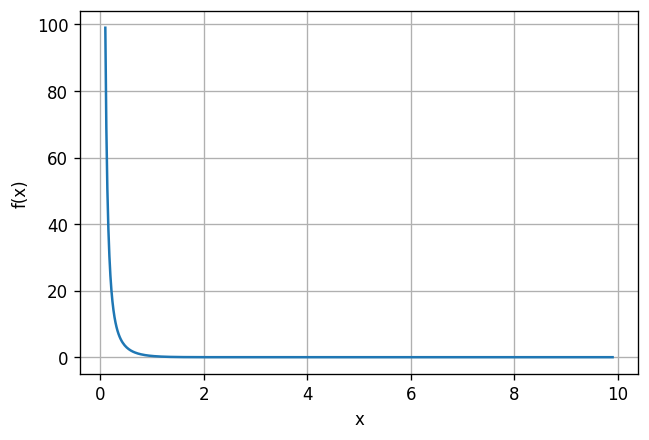

In [8]:
plt.figure(dpi=120)
plt.plot(xn, f(xn))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.savefig('figures/f_x.png')
plt.show()

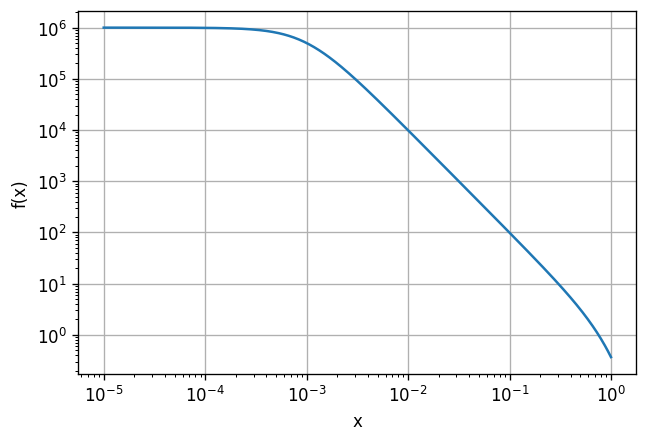

In [9]:
plt.figure(dpi=120)
logxn = np.logspace(-5,0,500)
plt.plot(logxn, f(logxn))
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.savefig('figures/f_x_log.png')
plt.show()

In [35]:
def integ_trapz(f, a, b, n):
    start = time()
    if n==0:
        return (0.5*(b-a)*(f(a)+f(b)), time()-start)
    
    hn = 1/(2**n)*(b-a)
    return (0.5*(integ_trapz(f, a, b, n-1)[0]) + hn*np.sum(f(a + hn*np.arange(start=1, stop=2**n+1, step=2))), time()-start)

In [36]:
integ_trapz_vec = np.vectorize(integ_trapz)

In [12]:
n = np.arange(25)
integ_trapz_vec(f, -3, 3, n)

array([8.22731936e-05, 3.00000000e+06, 1.50000014e+06, 7.50001592e+05,
       3.75005603e+05, 1.87514188e+05, 9.37816382e+04, 4.69416649e+04,
       2.35741785e+04, 1.19946166e+04, 6.40683318e+03, 3.97146020e+03,
       3.22541820e+03, 3.13923285e+03, 3.13805110e+03, 3.13805088e+03,
       3.13805088e+03, 3.13805088e+03, 3.13805088e+03, 3.13805088e+03,
       3.13805088e+03, 3.13805088e+03, 3.13805088e+03, 3.13805088e+03,
       3.13805088e+03])

In [55]:
for n in range(0,25):
    if np.abs(integ_trapz(f, -3, 3, n+1)[0] - integ_trapz(f, -3, 3, n)[0]) <= 1e-3:
        break

n

14

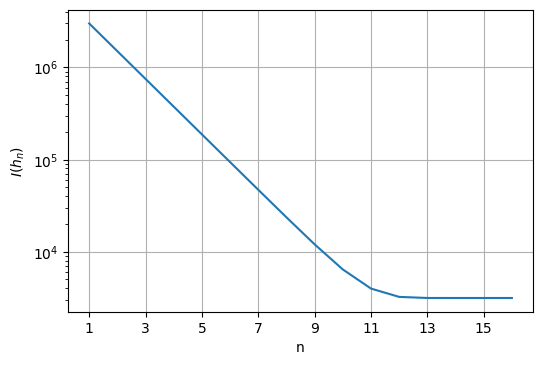

In [14]:
n = np.arange(start=1,stop=17)
plt.figure(dpi=100)
plt.plot(n, integ_trapz_vec(f, -3, 3, n))
plt.xticks(np.arange(1,17,step=2))
plt.xlabel('n')
plt.ylabel(r'$I\left( h_n \right)$')
plt.yscale('log')
plt.grid()
plt.savefig('figures/trapz_f_0_17_log.png')
plt.show()

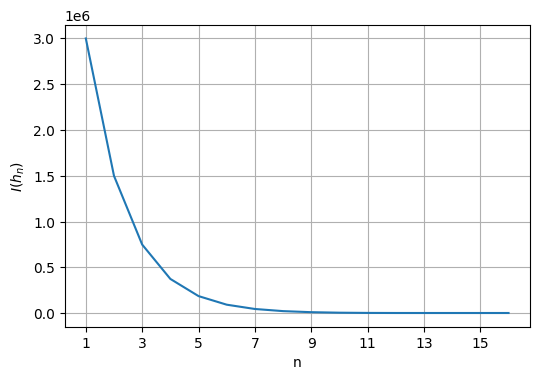

In [15]:
n = np.arange(start=1,stop=17)
plt.figure(dpi=100)
plt.plot(n, integ_trapz_vec(f, -3, 3, n))
plt.xticks(np.arange(1,17,step=2))
plt.xlabel('n')
plt.ylabel(r'$I\left( h_n \right)$')
plt.grid()
plt.savefig('figures/trapz_f_0_17.png')
plt.show()

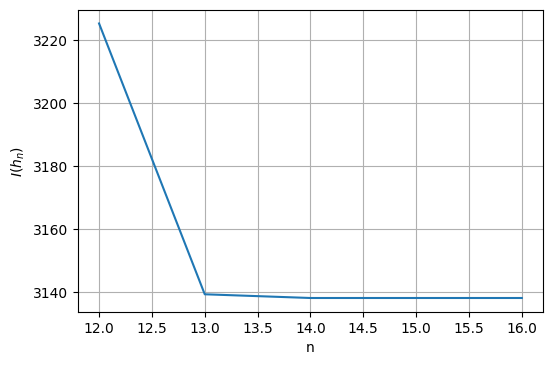

In [16]:
n = np.arange(start=12,stop=17)
integ_trapz_vec = np.vectorize(integ_trapz)
plt.figure(dpi=100)
plt.plot(n, integ_trapz_vec(f, -3, 3, n))
plt.xlabel('n')
plt.ylabel(r'$I\left( h_n \right)$')
# plt.yscale('log')
plt.grid()
plt.savefig('figures/trapz_f_10_21.png')
plt.show()

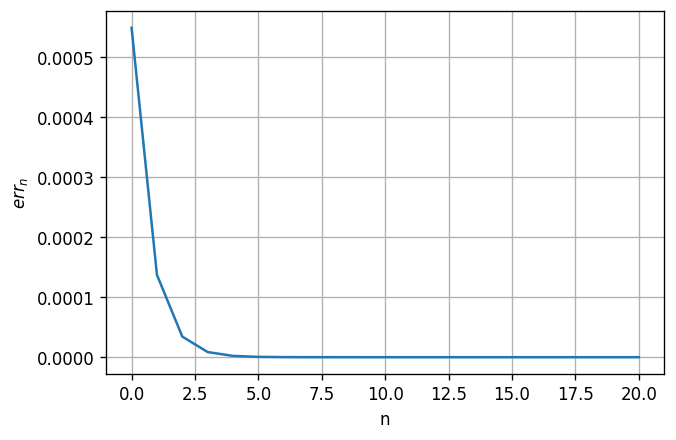

In [17]:
n = np.arange(0,21)
hn = 6/(2**n)
err_n = np.abs((1/12)*hn**2*(dfdx(3)-dfdx(-3)))
plt.figure(dpi=120)
plt.plot(n, err_n)
plt.xlabel('n')
plt.ylabel(r'$err_{n}$')
plt.grid()
plt.savefig('figures/trapz_err_0_21.png')
plt.show()

In [19]:
err_n[11]

1.3076971796169374e-10

In [72]:
-(1/12)*(6**3)*1/(2**(2*25))*df2_max

0.031974455083627625

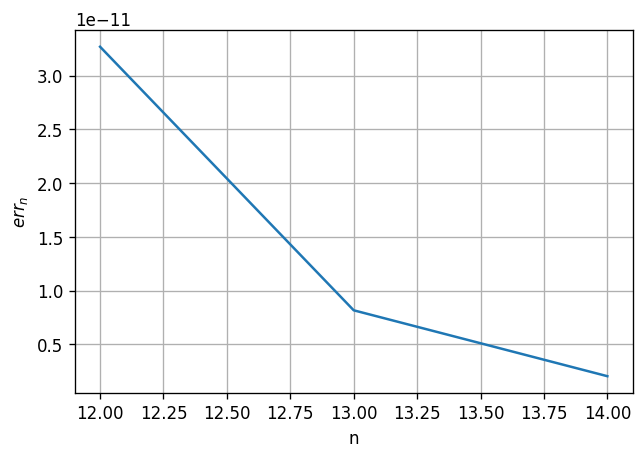

In [74]:
n = np.arange(12,15)
hn = 6/(2**n)
err_n = np.abs((1/12)*hn**2*(dfdx(3)-dfdx(-3)))
plt.figure(dpi=120)
plt.plot(n, err_n)
plt.xlabel('n')
plt.ylabel(r'$err_{n}$')
plt.grid()
plt.savefig('figures/trapz_err_13_21.png')
plt.show()

In [20]:
def romberg_integ(f, a, b, n):
    start = time()
    R = np.zeros((n+1,n+1))

    R[0,0] = 0.5*(b-a)*(f(a)+f(b))
    for i in range(1, n+1):
        hn = 1/(2**i)*(b-a)
        R[i,0] = 0.5*R[i-1,0] + hn*np.sum(f(a + hn*np.arange(start=1, stop=2**i+1, step=2)))

    for i in range(1, n+1):
        for j in range(1, i+1):
            R[i,j] = R[i,j-1] + 1/((4**j)-1)*(R[i, j-1] - R[i-1, j-1])

    return R[n,n], time() - start

In [31]:
T_romb = 0
for i in range(1000):
    T_romb += romberg_integ(f, -3, 3, 18)[1]

T_romb /= 1000

In [37]:
T_trpz = 0
for i in range(1000):
    T_trpz += integ_trapz(f, -3, 3, 15)[1]

T_trpz /= 1000

In [29]:
integ_trapz(f, -3, 3, 15)

3138.0508811545124

In [41]:
for n in range(0,25):
    if np.abs(romberg_integ(f, -3, 3, n+1)[0] - romberg_integ(f, -3, 3, n)[0]) <= 1e-6:
        break

n

16

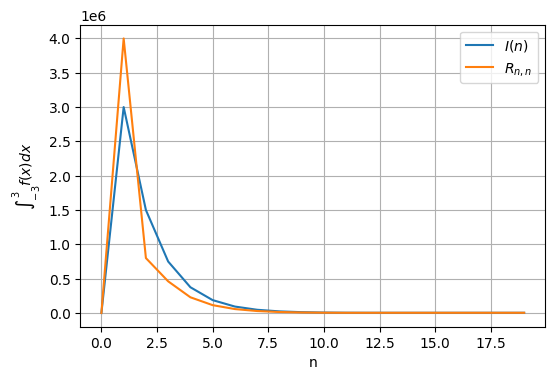

In [12]:
n = np.arange(start=0,stop=20)
integ_trapz_vec = np.vectorize(integ_trapz)
romberg_integ_vec = np.vectorize(romberg_integ)
plt.figure(dpi=100)
plt.plot(n, integ_trapz_vec(f, -3, 3, n), label=r'$I \left( n \right)$')
plt.plot(n, romberg_integ_vec(f, -3, 3, n), label=r'$R_{n,n}$')
plt.xlabel('n')
plt.ylabel(r'$\int_{-3}^{3} f\left(x\right) dx$')
plt.legend()
plt.grid()
plt.show()

In [39]:
def adaptive_integ(f, a, b, err):
    start = time()
    x = a
    h = b-a
    c = 0

    max_attempts = 1000

    def adaptive_step(x, h):
        for i in range(max_attempts):
            cur_trapz = 0.5*h*(f(x) + f(x + h))
            fine_trapz = 0.5*(h/2)*(f(x) + f(x + h/2)) + 0.5*(h/2)*(f(x + h/2) + f(x + h))
            delta = np.abs(cur_trapz - fine_trapz)

            s = 2
            h_est = h*err/delta
            if h_est > s*h:
                h_est = s*h
            elif h_est < h/s:
                h_est = h/s

            h_old = h
            h = h_est

            if delta < err:
                return cur_trapz, x+h_old, h

    while x + h <= b:
        df, x, h = adaptive_step(x, h)
        c += df
    if x < b:
        c += 0.5*(b-x)*(f(x) + f(b))

    return c, time() - start

In [53]:
T_adpt = 0
for i in range(100):
    T_adpt += adaptive_integ(f, -3, 3, 1e-8)[1]

T_adpt /= 100

In [56]:
T_romb_2 = 0
for i in range(1000):
    T_romb_2 += romberg_integ(f, -3, 3, 16)[1]

T_romb_2 /= 1000

In [57]:
T_trpz_2 = 0
for i in range(1000):
    T_trpz_2 += integ_trapz(f, -3, 3, 14)[1]

T_trpz_2 /= 1000

In [62]:
integ_trapz(f, -3, 3, 15)

(3138.0508811545124, 0.0030183792114257812)

In [59]:
romberg_integ(f, -3, 3, 16)

(3138.050456699313, 0.0055370330810546875)

In [64]:
adaptive_integ(f, -3, 3, 1e-13)

(3138.0508812050784, 41.01290941238403)